Epoch 1/1000
895/895 [==============================] - 1s 844us/step - loss: 415.6888 - mse: 415.6888 - val_loss: 415.8013 - val_mse: 415.8013
Epoch 2/1000
895/895 [==============================] - 1s 757us/step - loss: 402.1466 - mse: 402.1466 - val_loss: 417.3610 - val_mse: 417.3610
Epoch 3/1000
895/895 [==============================] - 1s 755us/step - loss: 402.0544 - mse: 402.0544 - val_loss: 414.8547 - val_mse: 414.8547
Epoch 4/1000
895/895 [==============================] - 1s 761us/step - loss: 401.7966 - mse: 401.7966 - val_loss: 417.1775 - val_mse: 417.1775
Epoch 5/1000
895/895 [==============================] - 1s 776us/step - loss: 400.4824 - mse: 400.4824 - val_loss: 415.0533 - val_mse: 415.0533
Epoch 6/1000
895/895 [==============================] - 1s 765us/step - loss: 401.1664 - mse: 401.1664 - val_loss: 414.6819 - val_mse: 414.6819
Epoch 7/1000
895/895 [==============================] - 1s 770us/step - loss: 400.5617 - mse: 400.5617 - val_loss: 417.3828 - val_mse: 4

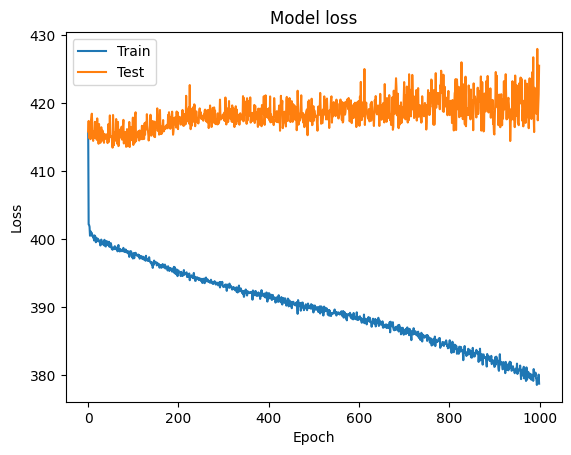

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load the dataset
url = 'https://raw.githubusercontent.com/AayzStha37/GEMLabHCIResearch/main/Unity%20based%20texture%20CSVs/MOD%20Wooden%20Floor_extracted_values_with_DFT321_without_duplicates.csv'
df = pd.read_csv(url)

# Separate features and target variable
y = df['DFT321']
x = df.drop('DFT321', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# -------Neural Network------

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=8, validation_data=(x_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, mse = model.evaluate(x_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
new_input_data = pd.DataFrame({
    'VELO-X': [-0.09],  
    'VELO-Y': [-0.01],  
    'VELO-Z': [0.05]
})

# Perform prediction
predictions = model.predict(new_input_data)

# Print or use the predictions
print("Predicted output:")
print(predictions)

1/1 [==============================] - 0s 14ms/step
Predicted output:
[[11.836917]]


In [ ]:
# --------LR----------

# MODEL PERFOEMANCE VISUALIZATION

# Training the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred,alpha =0.3)

z= np.polyfit(y_train, y_lr_train_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('Experimental DFT321')

## MODEL PERFOEMANCE VISUALIZATION

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_lr_test_pred,alpha =0.3)

z= np.polyfit(y_test, y_lr_test_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('Experimental DFT321')

In [ ]:
# --------RF----------

## MODEL PERFOEMANCE VISUALIZATION

# Training the Random Forest model
rf = RandomForestRegressor(max_depth=32, random_state=42)
rf.fit(x_train,y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred,alpha =0.3)

z= np.polyfit(y_train, y_rf_train_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('(Train) Experimental DFT321')

## MODEL PERFOEMANCE VISUALIZATION

plt.figure(figsize=(5,5))
plt.scatter(x=y_test, y=y_rf_test_pred,alpha =0.3)

z= np.polyfit(y_test, y_rf_test_pred,1)
p =np.poly1d(z)

plt.plot(y_train,p(y_train),'#f8766d')
plt.ylabel('Predicted DFT321')
plt.xlabel('(Test) Experimental DFT321')